In [159]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [160]:
df = pd.read_csv('eplresults.csv')
df = df.loc[2824:]
df = df.reset_index(drop=True)

In [161]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [162]:
df.isnull()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7907,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7908,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [163]:
df = df.drop(['DateTime', 'Season', 'Referee', 'HomeTeam', 'AwayTeam'],axis =1)

In [164]:
print(df.nunique())

FTHG    10
FTAG     9
FTR      3
HTHG     6
HTAG     6
HTR      3
HS      40
AS      31
HST     24
AST     21
HC      21
AC      20
HF      30
AF      29
HY       8
AY      10
HR       4
AR       3
dtype: int64


In [165]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn
df.dtypes
print(df.nunique())

FTHG    10
FTAG     9
FTR      3
HTHG     6
HTAG     6
HTR      3
HS      40
AS      31
HST     24
AST     21
HC      21
AC      20
HF      30
AF      29
HY       8
AY      10
HR       4
AR       3
dtype: int64


In [166]:
#Given that I have 17 or so features, how do I build a model to predict match outcome?
df.dtypes

FTHG      int64
FTAG      int64
FTR      object
HTHG    float64
HTAG    float64
HTR      object
HS      float64
AS      float64
HST     float64
AST     float64
HC      float64
AC      float64
HF      float64
AF      float64
HY      float64
AY      float64
HR      float64
AR      float64
dtype: object

In [167]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn
from sklearn.model_selection import train_test_split


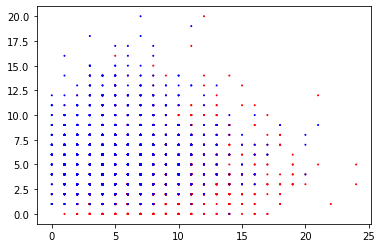

In [168]:
plt.scatter(df['HST'], df['AST'], df['FTR']=='H', color = 'red')
plt.scatter(df['HST'], df['AST'], df['FTR']=='A', color = 'blue')

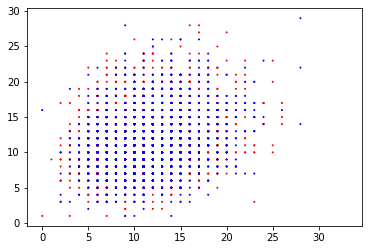

In [169]:
#Logistic Regression Model
plt.scatter(df['HF'], df['AF'], df['FTR']=='H', color = 'red')
plt.scatter(df['HF'], df['AF'], df['FTR']=='A', color = 'blue')

In [170]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df[['HST','AST']].values, 
                                              (df.FTR == "H").values,random_state=5)

clf = LogisticRegression()
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.6708796764408493


In [171]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): 
        clf.fit(x[train], y[train]) 
        result += score_func(clf.predict(x[test]), y[test]) 
    return result / nfold 

In [172]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.6690839916975783


In [173]:
Cs = [0.001, 0.1, 1, 10, 100]
max_score = 0

for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print (max_score, best_C)

0.6692526257616592 0.001


In [174]:
clfl=LogisticRegression(C=best_C)
clfl.fit(Xlr, ylr)
ypred=clfl.predict(Xtestlr)
accuracy_score(ypred, ytestlr)

0.6708796764408493

In [175]:
print(classification_report(ytestlr, ypred))

              precision    recall  f1-score   support

       False       0.67      0.78      0.72      1076
        True       0.67      0.55      0.60       902

    accuracy                           0.67      1978
   macro avg       0.67      0.66      0.66      1978
weighted avg       0.67      0.67      0.67      1978



In [176]:
from sklearn.model_selection import train_test_split

X= df.drop(['FTR', 'HTR', 'FTHG', 'FTAG', 'HTHG', 'HTAG'],axis=1)
y=df['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [177]:
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [178]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [196]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1, 
                             max_depth=5, max_features=3, n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)



f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.544
Random Forest: f1-score=0.461


In [197]:
accuracy_score(y_train, model_res.predict(X_train_scaled))

0.5628950695322377

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.52      0.49      0.50       441
           D       0.60      0.01      0.01       396
           H       0.55      0.86      0.67       745

    accuracy                           0.54      1582
   macro avg       0.56      0.45      0.40      1582
weighted avg       0.55      0.54      0.46      1582



In [199]:
class_names=['H','A','D']

Confusion matrix, without normalization
[[215   1 225]
 [100   3 293]
 [102   1 642]]
Normalized confusion matrix
[[0.49 0.   0.51]
 [0.25 0.01 0.74]
 [0.14 0.   0.86]]


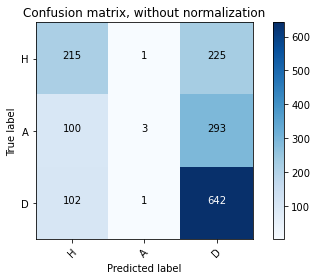

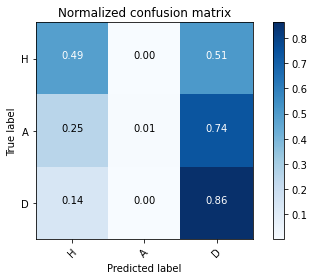

In [200]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

12


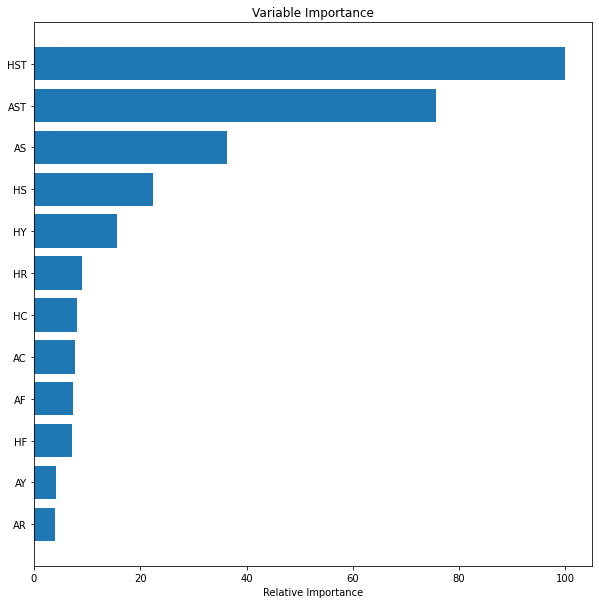

In [201]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [195]:
# I need to adjust this to value the correct features but this is a start

In [186]:
# Classification report